In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing data

df = pd.read_csv(r'C:\Users\USER\Desktop\packt\ML projects\CODES\2. Multiple Linear Regression\Multiple_Linear_Regression\Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Encoding 2 - factor categorical data 

In [3]:
df['mainroad'] = df['mainroad'].map({'yes':1 , 'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1 , 'no':0})
df['basement'] = df['basement'].map({'yes':1 , 'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1 , 'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1 , 'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1 , 'no':0})

# Encoding categorical data of factor level > 2

In [4]:
x = pd.get_dummies(df['furnishingstatus'],drop_first=True)

In [5]:
df = pd.concat([df,x],axis=1)

In [6]:
df.drop('furnishingstatus',inplace=True,axis=1)

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# FEATURE ADDITION

In [8]:
# Let us create the new metric and assign it to "areaperbedroom"
df['areaperbedroom'] = df['area']/df['bedrooms']

# Metric: bathrooms per bedroom
df['bbratio'] = df['bathrooms']/df['bedrooms']

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


# NORMALISING THE DATA

In [10]:
def norm(x):
    return (x-min(x)) / (max(x)-min(x))

df = df.apply(norm)              

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


# DATA SPLIT

In [12]:
import statsmodels.api as sm

X = sm.add_constant(df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']])
y = df['price']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# APPLYING RFE TO LINEAR MODEL

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  

In [16]:
lm = LinearRegression()

In [17]:
rfe = RFE(estimator=lm , n_features_to_select=10)

In [18]:
rfe = rfe.fit(X_train,y_train)

In [19]:
rfe.support_

array([False,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True, False, False,  True,  True])

In [20]:
rfe.ranking_

array([7, 1, 2, 1, 1, 1, 3, 5, 1, 1, 1, 1, 6, 4, 1, 1])

In [21]:
# Best features

X_train.columns[rfe.support_]

Index(['area', 'bathrooms', 'stories', 'mainroad', 'hotwaterheating',
       'airconditioning', 'parking', 'prefarea', 'areaperbedroom', 'bbratio'],
      dtype='object')

# MODEL BUILDING

In [22]:
X1 = sm.add_constant(df[['area', 'bathrooms', 'stories', 'mainroad', 'hotwaterheating',
       'airconditioning', 'parking', 'prefarea', 'areaperbedroom', 'bbratio']])
y1 = df['price']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=100)

In [25]:
lm1 = sm.OLS(y_train,X_train).fit()

In [26]:
print(lm1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.659    
Dependent Variable: price            AIC:                -725.8508
Date:               2020-05-03 21:22 BIC:                -682.4800
No. Observations:   381              Log-Likelihood:     373.93   
Df Model:           10               F-statistic:        74.47    
Df Residuals:       370              Prob (F-statistic): 2.57e-82 
R-squared:          0.668            Scale:              0.0084681
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0133   0.0210  0.6330 0.5271 -0.0280  0.0545
area                0.6391   0.1300  4.9159 0.0000  0.3835  0.8948
bathrooms           0.1751   0.0967  1.8111 0.0709 -0.0150  0.3652
stories             0.0883   0.0188  4.6980 0.0000  0.0513  0.1252
mainroad     

# RESIDUAL ANALYSIS

In [27]:
x = sm.ProbPlot(lm1.resid_pearson)

Text(0.5, 1.0, 'Residual Analysis')

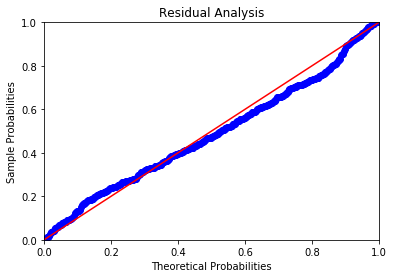

In [28]:
x.ppplot(line='45')
plt.title('Residual Analysis')

# TEST OF HOMOSCEDASTICITY

Text(0.5, 1.0, 'Test for homoscedasticity')

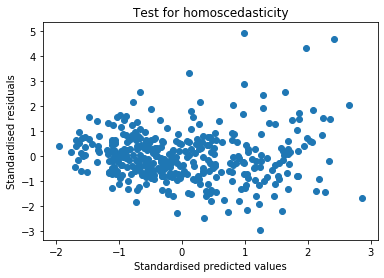

In [29]:
def stand(x):
    return (x - x.mean()) / x.std()

plt.scatter(stand(lm1.fittedvalues) , stand(lm1.resid))
plt.xlabel('Standardised predicted values')
plt.ylabel('Standardised residuals')
plt.title('Test for homoscedasticity')

In [30]:
len(X_test)

164

In [31]:
len(X_train)

381

Text(0, 0.5, 'price')

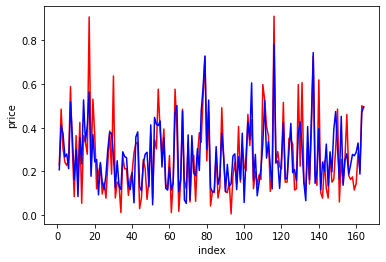

In [32]:
# Actual vs Predictions

c = [i for i in range(1,165,1)]

plt.plot(c,y_test,'red')
plt.plot(c,lm1.predict(X_test),'blue')
plt.xlabel('index')
plt.ylabel('price')

Text(0.5, 1.0, 'Error terms')

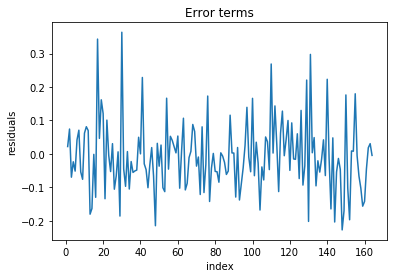

In [33]:
# Error terms

c = [i for i in range(1,165,1)]

plt.plot(c,y_test-lm1.predict(X_test))
plt.xlabel('index')
plt.ylabel('residuals')
plt.title('Error terms')

Text(0, 0.5, 'predicted data ')

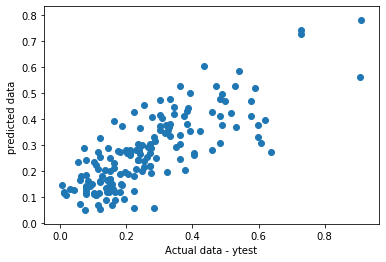

In [34]:
# Spread

plt.scatter(y_test,lm1.predict(X_test))
plt.xlabel('Actual data - ytest')
plt.ylabel('predicted data ')

In [35]:
# RMSE

from sklearn import metrics

metrics.mean_squared_error(y_test,lm1.predict(X_test))

0.010977285758830382